# 問題設定
$y=1$すなわち陽性である確率を$\gamma$とする。これは非常に小さいとする。この時、診断で陽性と出た人が実際に陽性である確率はいくらか。

診断には何かの属性が必要なので、それを${x}$とする。データは
$$
\mathcal{D} = \{ (y^{(n)},x^{(n)}) \mid n=1,\ldots,N\}
$$
である。診断誤差、測定誤差などから、完璧な診断はあり得ない。
%真のモデルを$q(y\mid x)$とする。また、
データから学習したモデルを$p(y \mid x)$とする。このモデルについて、感度すなわち異常標本精度が$1-\alpha$、特異度すなわち正常標本精度が$1-\beta$とする。$\alpha$も$\beta$も1より非常に小さい。すなわち非常に正確な診断を行えるとする。

さて、診断につかうスコア関数を
\begin{align}
    a(x) = \frac{p(y=1 \mid x)}{p(y=0 \mid x)}
\end{align}
とすると、求めたいものは、$a(x)>1$の時に$y=1$となる条件付き確率
$$
P(y=1 \mid a(x)>1)
$$
である。

# ベイズの定理からの結果
ベイズの定理から
\begin{align}
   P(y=1 \mid a(x)>1) = \frac{
   P( a(x)>1 \mid y=1) p(y=1) 
   }{
   P( a(x)>1 \mid y=1) p(y=1)  + P( a(x)>1 \mid y=0) p(y=0) } 
\end{align}
ここに現れる確率をデータから見積もればこの計算は可能である。これを点推定で行うとしよう。

- $P( a(x)>1 \mid y=1)$: 陽性（病気）の標本の中で、スコア関数が陽性と答える確率。つまり異常標本精度。これをパラメトライズするとしたら、精度そのものをパラメターとすればいいので、結局$1 - \alpha$である。
- $P( a(x)>1 \mid y=0)$: これは同様に$\beta$である。
- $p(y=1)$は先験的なエイズの確率で、これを$0 <\gamma \ll 1$とおいておく


念のため、感度と特異度は次のようになる。
\begin{align}
    1-\alpha &= \frac{1}{\frac{1}{N}\sum_n \delta(y^{(n)},1)}\frac{1}{N}\sum_n \delta(y^{(n)},1) I(a(x^{(n)}>1)
    \\
    1-\beta &= \frac{1}{\frac{1}{N}\sum_n \delta(y^{(n)},0)}\frac{1}{N}\sum_n \delta(y^{(n)},0) I(a(x^{(n)}<1)
\end{align}
最初の式の分母は陽性となる確率$p(y=1)$で、分子は、陽性でかつスコア関数が$a>1$となる同時確率なので$p(a>1|y=1)$に対応していることがわかる。どこにも矛盾はない。

ということで、求めるものは、
\begin{align}
    P(y=1 \mid a(x)>1) = \frac{
    (1-\alpha)\gamma
    }{
    (1-\alpha)\gamma + \beta (1-\gamma)
    }
\end{align}
となる。$\alpha$と$\beta$が双方0なら、これは必ず1になる。問題はこれらをどこまで0に近づければ実用上合理的な$P(y=1 \mid a(x)>1) $を達成できるかである。

同様に、
\begin{align}
    P(y=0 \mid a(x)<1) = \frac{
    (1-\beta)(1-\gamma)
    }{
    (1-\beta)(1-\gamma) + \alpha \gamma
    }
\end{align}

# $0 < \alpha,\beta,\gamma \ll 1$の時の近似式


すべての高次の項を無視すると
\begin{align}
    P(y=1 \mid a(x)>1) &\approx \frac{
    \gamma
    }{
    \gamma + \beta 
    }=
    \begin{cases}
    1 - \frac{\beta}{\gamma}, &\gamma \gg \beta
    \\
    \frac{\gamma}{\beta}, &\gamma \ll \beta
    \end{cases},
\\
 P(y=0 \mid a(x)<1) & \approx 1
\end{align}
すなわち、前者の場合、$\beta$が$\gamma$より格段に小さくないと1にならないことが分かる。すなわち、**HIV診断のようなまれな事象の検知問題の場合、実用的な陽性の精度を得るためには、$\beta \ll \gamma$でないといけない**。言葉で言うと、正常標本を異常と間違える意味の誤差率は、HIVの先験確率よりもかなり小さくなければならない。言い換えると、正常標本誤差の下限は、異常標本割合で決められる。

考えてみれば当たり前である。圧倒的多数が正常標本であれば、正常標本の分類精度にはより厳しい条件が必要になる。


In [28]:
import numpy as np
alpha = 0.01 # 感度=異常標本精度が99%なので、間違えるのは1%
beta = 0.01 # 特異度は99%なので間違えるのは1%
gamma = 1/10000 # 放射線診断専門医 @economics_dr さんの数字
prob_TP = (1-alpha)*gamma / ((1-alpha)*gamma + beta*(1-gamma))
prob_TN = (1-beta)*(1-gamma) / ((1-beta)*(1-gamma) + alpha*gamma)
print('P(y=1 |a(x)>1 )={}, P(y=0 |a(x)<1)={}'.format(prob_TP,prob_TN))


P(y=1 |a(x)>1 )=0.00980392156862745, P(y=0 |a(x)<1)=0.9999989897989902


Text(0, 0.5, 'True postive ratio')

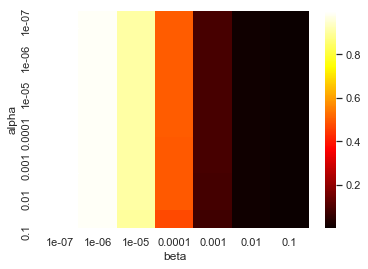

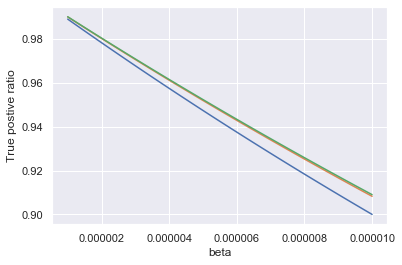

In [32]:
%matplotlib inline
# HIV example
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
#alpha = 0.01 # 感度=異常標本精度が99%なので、間違えるのは1%
#beta = 0.01 # 特異度は99%なので間違えるのは1%
gamma = 1/10000 # 放射線診断専門医 @economics_dr さんの数字

num = 7
alphas = np.geomspace(start=1e-7,stop=1e-1,num=num)
betas = np.geomspace(start=1e-7,stop=1e-1,num=num)
heat_TP = pd.DataFrame(0,index=alphas,columns=betas)
for ialpha in range(len(alphas)):
    alpha = alphas[ialpha]
    heat_TP.iloc[ialpha,:] = (1-alpha)*gamma / ((1-alpha)*gamma + betas*(1-gamma))

fig, ax = plt.subplots()
sns.heatmap(heat_TP,ax=ax,cmap='hot')
ax.set_xlabel("beta")
ax.set_ylabel("alpha")


# Line plot
num = 100
betas = np.linspace(start=1e-6,stop=1.e-5,num=num)
alphas = [0.1,0.01,0.001]
fig, axes = plt.subplots()
for ii in range(len(alphas)):
    alpha = alphas[ii]
    x =  (1-alpha)*gamma / ((1-alpha)*gamma + betas*(1-gamma))
    axes.plot(betas,x)
axes.set_xlabel("beta")
axes.set_ylabel("True postive ratio")